In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

matches=pd.read_csv("R:\\ipl data\\matches.csv")
deliveries=pd.read_csv("R:\\ipl data\\deliveries.csv")
orange_cap=pd.read_csv("R:\\ipl data\\orange_cap.csv")
purple_cap=pd.read_csv("R:\\ipl data\\purple_cap.csv")

matches.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,match_result,match_winner,wb_runs,wb_wickets,balls_left,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 22,2025","Eden Gardens, Kolkata",KKR,RCB,League,RCB,Bowl,174.0,8.0,...,completed,RCB,NaN,7,22.0,Krunal Pandya,Virat Kohli,59.0,Krunal Pandya,3--29
1,2,"March 23,2025","Rajiv Gandhi International Stadium, Hyderabad",SRH,RR,League,RR,Bowl,286.0,6.0,...,completed,SRH,44,NaN,0.0,Ishan Kishan,Ishan Kishan,106.0,Tushar Deshpande,3--44
2,3,"March 23,2025","MA Chidambaram Stadium, Chennai",CSK,MI,League,CSK,Bowl,155.0,9.0,...,completed,CSK,NaN,4,5.0,Noor Ahmad,Rachin Ravindra,65.0,Noor Ahmad,4--18
3,4,"March 24,2025","ACA-VDCA Cricket Stadium, Vishakhapatnam",DC,LSG,League,DC,Bowl,209.0,8.0,...,completed,DC,NaN,1,3.0,Ashutosh Sharma,Nicholas Pooran,75.0,Mitchell Starc,3--42
4,5,"March 25,2025","Narendra Modi Stadium, Ahmedabad",GT,PBKS,League,GT,Bowl,243.0,5.0,...,completed,PBKS,11,NaN,0.0,Shreyas Iyer,Shreyas Iyer,97.0,Sai Kishore,3--30


In [3]:
deliveries.head()

,match_no,date,stage,venue,batting_team,bowling_team,innings,over,striker,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,wicket_type,player_dismissed,fielder
0,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.1,de Kock,Hazlewood,0,0,0,0,0,0,NaN,NaN,NaN
1,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.2,de Kock,Hazlewood,4,0,0,0,0,0,NaN,NaN,NaN
2,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.3,de Kock,Hazlewood,0,0,0,0,0,0,NaN,NaN,NaN
3,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.4,de Kock,Hazlewood,0,0,0,0,0,0,NaN,NaN,NaN
4,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.5,de Kock,Hazlewood,0,0,0,0,0,0,caught,de Kock,Jitesh Sharma


In [4]:
orange_cap.head()

,Position,Batsman,Team,Matches,Innings,Not_out,Runs,Highest_score,Average,Balls_faced,Strike_rate,Hundreds,Fifties,Ducks,Fours,Sixes
0,1,Sai Sudharsan,GT,15,15,1,759,108,54.21,486,156.17,1,6,0,88,21
1,2,Suryakumar Yadav,MI,16,16,5,717,73,65.18,427,167.91,0,5,0,69,38
2,3,Virat Kohli,RCB,15,15,3,657,73,54.75,454,144.71,0,8,0,66,19
3,4,Shubman Gill,GT,15,15,2,650,93,50.00,417,155.87,0,6,0,62,24
4,5,Mitchell Marsh,LSG,13,13,0,627,117,48.23,383,163.70,1,6,2,56,37


In [5]:
purple_cap.head()

,Position,Bowler,Team,Matches,Innings,Balls,Overs,Maidens,Runs,Wickets,Best_bowling_figure,Economy_rate,Four_wicket_haul,Five_wicket_hall
0,1,Prasidh Krishna,GT,15,15,354,59.0,0,488,25,4--41,8.27,1,0
1,2,Noor Ahmad,CSK,14,14,300,50.0,0,408,24,4--18,8.16,2,0
2,3,Josh Hazlewood,RCB,12,12,264,44.0,0,386,22,4--33,8.77,1,0
3,4,Trent Boult,MI,16,16,346,57.4,0,517,22,4--26,8.96,1,0
4,5,Arshdeep Singh,PBKS,17,16,350,58.2,1,518,21,3--16,8.88,0,0


In [7]:
# Toss win effect: did the toss winner win the match?
matches['toss_win'] = np.where(matches['toss_winner'] == matches['match_winner'], 1, 0)

# Encode venue as numeric
matches['venue_dummy'] = pd.factorize(matches['venue'])[0]

# Create target variable for modeling: did team1 win?
matches['team1_win'] = np.where(matches['team1'] == matches['match_winner'], 1, 0)
toss_effect = matches['toss_win'].value_counts(normalize=True) * 100
print("Percentage of matches where toss winner won:", toss_effect[1])


Percentage of matches where toss winner won: 56.75675675675676


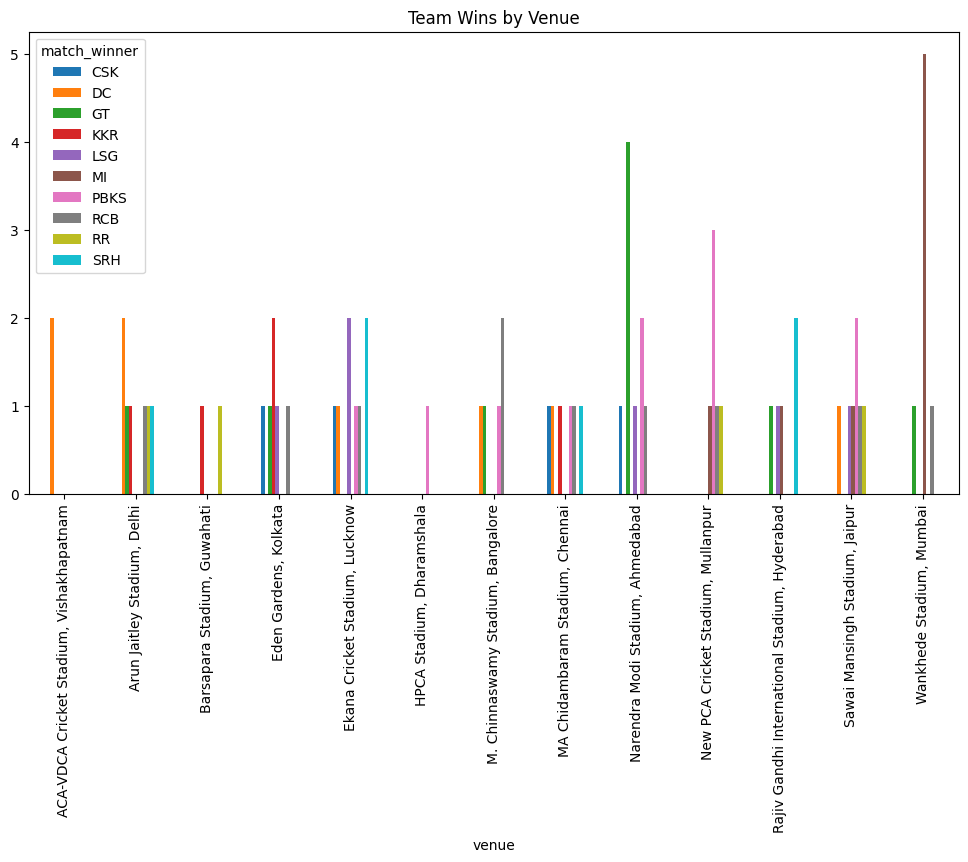

In [8]:

venue_wins = matches.groupby('venue')['match_winner'].value_counts().unstack().fillna(0)
venue_wins.plot(kind='bar', figsize=(12,6))
plt.title("Team Wins by Venue")
plt.show()


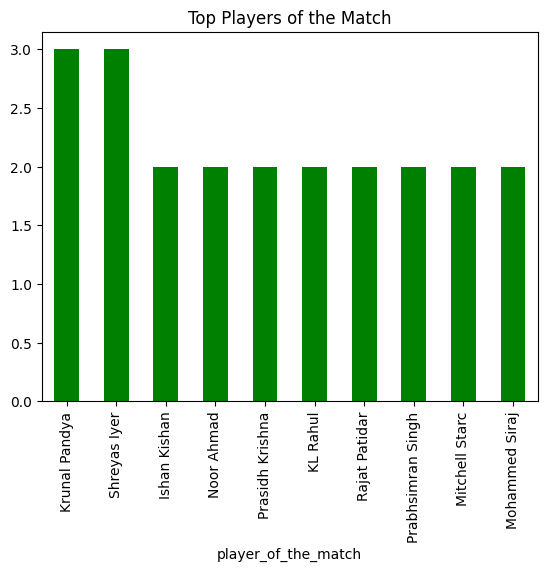

In [9]:
top_players = matches['player_of_the_match'].value_counts().head(10)
top_players.plot(kind='bar', color='green')
plt.title("Top Players of the Match")
plt.show()


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = matches[['toss_win','venue_dummy']]
y = matches['team1_win']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6956521739130435
              precision    recall  f1-score   support

           0       0.68      1.00      0.81        15
           1       1.00      0.12      0.22         8

    accuracy                           0.70        23
   macro avg       0.84      0.56      0.52        23
weighted avg       0.79      0.70      0.61        23



In [12]:
# Total runs per batsman
batsman_runs = deliveries.groupby('striker')['runs_of_bat'].sum().sort_values(ascending=False)

# Balls faced per batsman
batsman_balls = deliveries.groupby('striker').size()

# Strike rate per batsman
batsman_strike_rate = (batsman_runs / batsman_balls) * 100

# Total wickets per bowler
bowler_wickets = deliveries[deliveries['player_dismissed'].notna()].groupby('bowler')['player_dismissed'].count()

# Economy rate per bowler
bowler_runs_conceded = deliveries.groupby('bowler')['runs_of_bat'].sum()
bowler_overs = deliveries.groupby('bowler').size() / 6
bowler_economy = bowler_runs_conceded / bowler_overs


In [13]:
# Total runs per batsman
batsman_runs = deliveries.groupby('striker')['runs_of_bat'].sum().sort_values(ascending=False)

# Balls faced per batsman
batsman_balls = deliveries.groupby('striker').size()

# Strike rate per batsman
batsman_strike_rate = (batsman_runs / batsman_balls) * 100

# Total wickets per bowler
bowler_wickets = deliveries[deliveries['player_dismissed'].notna()].groupby('bowler')['player_dismissed'].count()

# Economy rate per bowler
bowler_runs_conceded = deliveries.groupby('bowler')['runs_of_bat'].sum()
bowler_overs = deliveries.groupby('bowler').size() / 6
bowler_economy = bowler_runs_conceded / bowler_overs


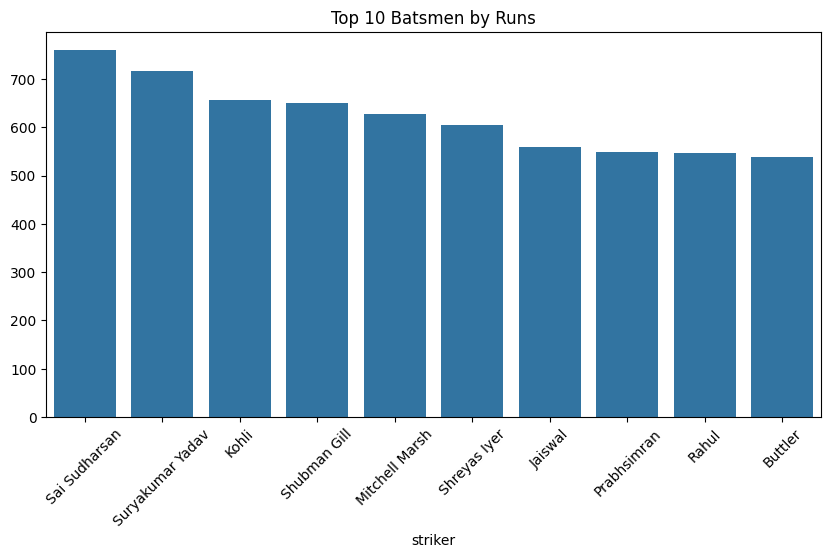

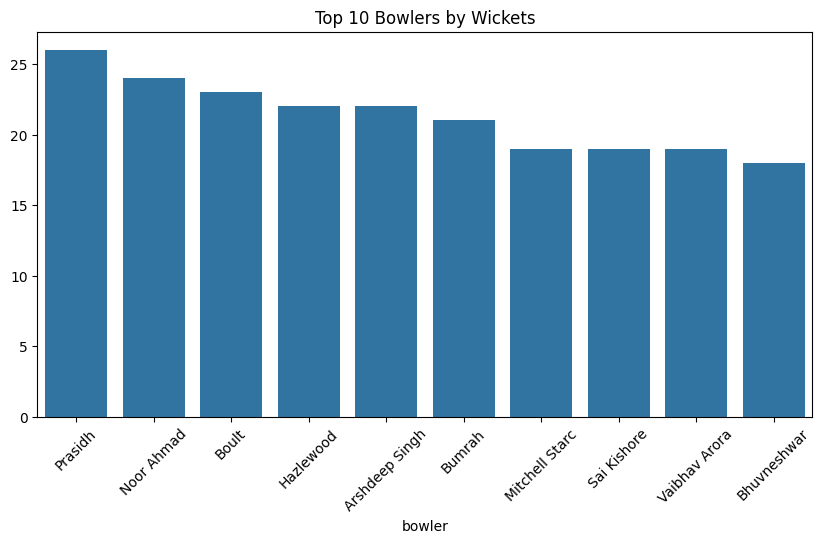

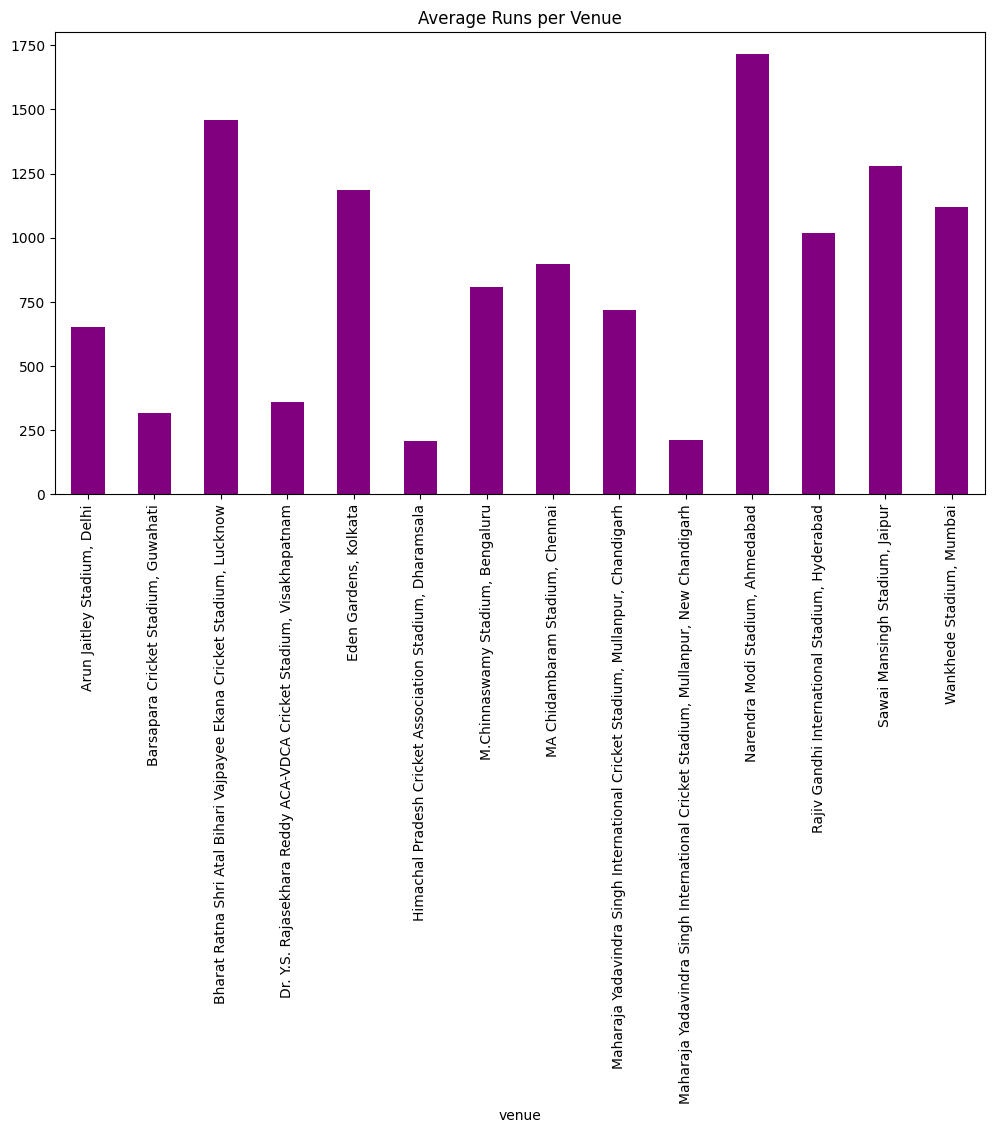

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 batsmen by total runs
top_batsmen = batsman_runs.head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_batsmen.index, y=top_batsmen.values)
plt.title("Top 10 Batsmen by Runs")
plt.xticks(rotation=45)
plt.show()

# Top 10 bowlers by wickets
top_bowlers = bowler_wickets.sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_bowlers.index, y=top_bowlers.values)
plt.title("Top 10 Bowlers by Wickets")
plt.xticks(rotation=45)
plt.show()

# Venue impact: average first innings score per venue
venue_avg_score = deliveries.groupby(['venue', 'innings'])['runs_of_bat'].sum().groupby(level=0).mean()
plt.figure(figsize=(12,6))
venue_avg_score.plot(kind='bar', color='purple')
plt.title("Average Runs per Venue")
plt.show()


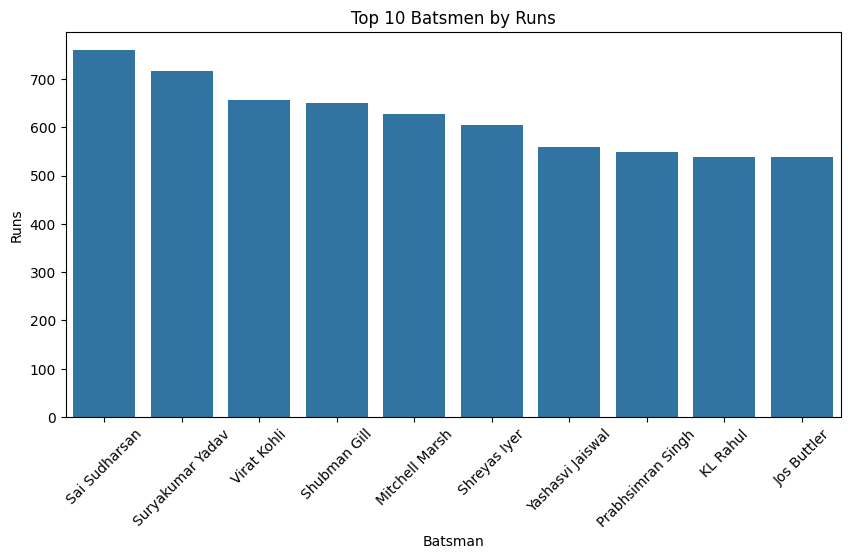

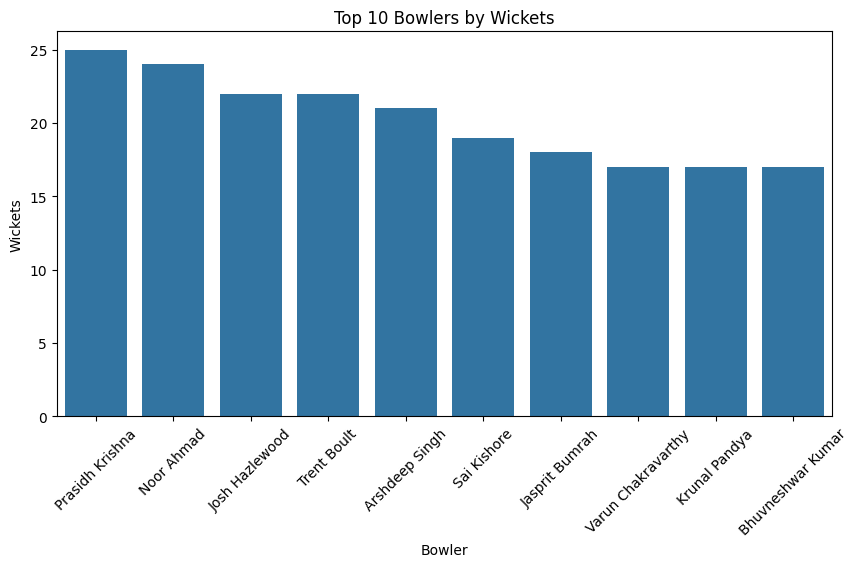

In [18]:


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

top_batsmen = orange_cap.sort_values('Runs', ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x='Batsman', y='Runs', data=top_batsmen)
plt.title("Top 10 Batsmen by Runs")
plt.xticks(rotation=45)
plt.show()

# Top 10 bowlers by Wickets
top_bowlers = purple_cap.sort_values('Wickets', ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x='Bowler', y='Wickets', data=top_bowlers)
plt.title("Top 10 Bowlers by Wickets")
plt.xticks(rotation=45)
plt.show()


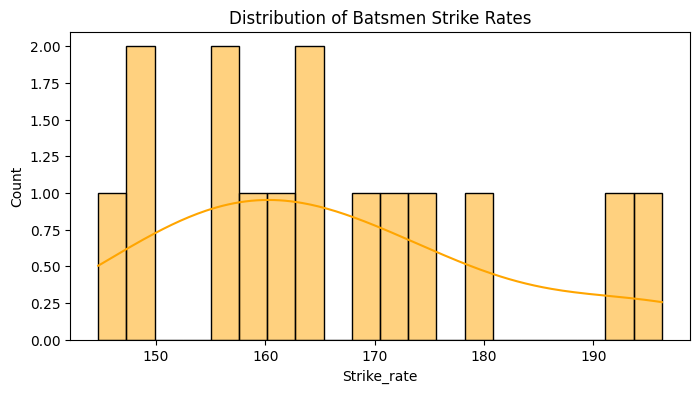

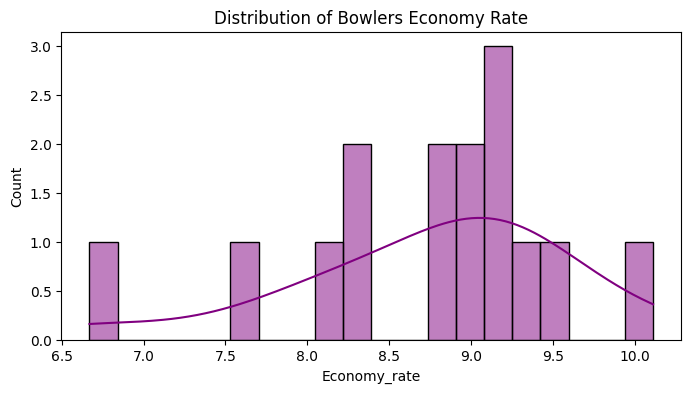

In [19]:
# Batsmen strike rate distribution
plt.figure(figsize=(8,4))
sns.histplot(orange_cap['Strike_rate'], bins=20, kde=True, color='orange')
plt.title("Distribution of Batsmen Strike Rates")
plt.show()

# Bowler economy rate distribution
plt.figure(figsize=(8,4))
sns.histplot(purple_cap['Economy_rate'], bins=20, kde=True, color='purple')
plt.title("Distribution of Bowlers Economy Rate")
plt.show()
# Merge top batsmen stats with matches for team insights
matches_batsmen = matches.merge(
    orange_cap[['Batsman','Runs','Strike_rate','Team']],
    left_on='top_scorer',
    right_on='Batsman',
    how='left'
)

# Merge top bowler stats with matches
matches_bowlers = matches.merge(
    purple_cap[['Bowler','Wickets','Economy_rate','Team']],
    left_on='best_bowling',
    right_on='Bowler',
    how='left'
)
